<p style="text-align:center;"><span style="font-size:60px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Hello Everybody</span></span></span></span></p>

<p style="text-align:center;"><span style="font-size:30px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Title : Facial Emotion Recognition Image Dataset</span></span></span></span></p>

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
​
<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/j2bBmHWx/Py-Torch-Gradient.jpg); background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b>📈「EfficientNetV2」Emotion Recognition</b></span></h1>
                   
## <center>If you feel my notebook helpful, support with one upvote, thank you</center>
## <center>Created by Mr.Tao  12/12/2023👍</center>

<div style="border-radius:10px; padding: 15px; background-color: #F0EFEB; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:900; font-size:200%"><font color=#d10202>📁 About Dataset</font></span></h4>    
    
The dataset consists of 6 distinct emotions : Happy, Angry, Sad, Neutral, Surprise and Ahegao. Images are RGB and presented as cropped faces with corresponding emotions. The images were collected by scrapping social nets as Facebook and Instagram, scrapping YouTube videos and already available datasets as IMDB and AffectNet.
1) dataset.zip contains folders with corresponding classes.
    
2) data.csv contains pathes to images and corresponding labels.

Kovenko, Volodymyr; Shevchuk, Vitalii (2021), “OAHEGA : EMOTION RECOGNITION DATASET”, Mendeley Data, V2, doi: 10.17632/5ck5zz6f2c.2.

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#Model PerformanceModel Performance;font-size:110%;text-align:left">
    
<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2> 
<p>
    
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3) 
- [4. Preprocessing](#4)  
- [5. Modeling](#5)      
- [6. Model Performance](#6)

<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    ➡️At first, we import nessesary python liblaries.
</span></h5>

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Read Dataset</h1>**

In [2]:
image_data='/kaggle/input/emotion-recognition-dataset/dataset'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,Surprise
1,Angry
2,Neutral
3,Sad
4,Happy
5,Ahegao


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/emotion-recognition-dataset/data...,Angry
1,/kaggle/input/emotion-recognition-dataset/data...,Ahegao
2,/kaggle/input/emotion-recognition-dataset/data...,Sad
3,/kaggle/input/emotion-recognition-dataset/data...,Happy
4,/kaggle/input/emotion-recognition-dataset/data...,Neutral
...,...,...
15448,/kaggle/input/emotion-recognition-dataset/data...,Neutral
15449,/kaggle/input/emotion-recognition-dataset/data...,Ahegao
15450,/kaggle/input/emotion-recognition-dataset/data...,Sad
15451,/kaggle/input/emotion-recognition-dataset/data...,Neutral


<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    ➡️ Here, we import image data from a dataset file, and turn it into a dataframe format, with Image representing the source of the photo and Label representing the filename.
</span></h5>

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Visualization</h1>**

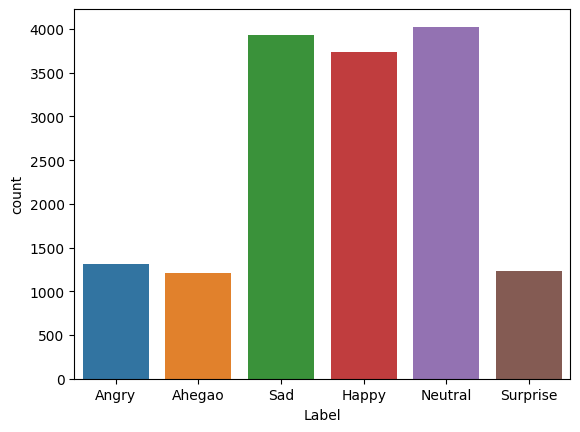

In [4]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 0);

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visualize the number of six categories.
</span></h5>

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Preprocessing</h1>**

In [5]:
train_data_dir =image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Found 15453 files belonging to 6 classes.
Using 3090 files for validation.


<h3 style="font-weight:700">keras.preprocessing</h3>
directory : Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

batch_size : Size of the batches of data. If None, the data will not be batched (the dataset will yield individual samples). Defaults to 32.

image_size : Size to resize images to after they are read from disk, specified as (height, width). Since the pipeline processes batches of images that must all have the same size, this must be provided. Defaults to (256, 256).

seed : Optional random seed for shuffling and transformations.

validation_split : Optional float between 0 and 1, fraction of data to reserve for validation.

subset : Subset of the data to return. One of "training", "validation", or "both". Only used if validation_split is set. When subset="both", the utility returns a tuple of two datasets (the training and validation datasets respectively).

In [6]:
train_size = len(train)
val_size = len(validation)
total = train_size + val_size

print(f'train samples count:\t\t{train_size}\t({(100 * train_size/total):.2f}%)')
print(f'validation samples count:\t{val_size}\t({(100 * val_size/total):.2f}%)')
print('================================================')
print(f'Total:\t\t\t\t{total}\t({(100 * total/total):.2f}%)')

train samples count:		194	(79.84%)
validation samples count:	49	(20.16%)
Total:				243	(100.00%)


In [7]:
class_names=train.class_names
class_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

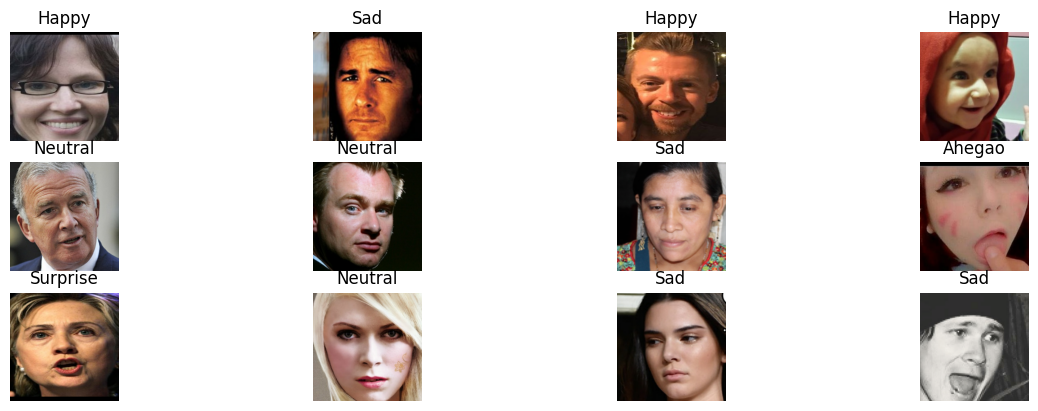

In [8]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(12):
        ax = plt.subplot(12, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visual observation of the label's corresponding photo.
</span></h5>

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Modeling</h1>**

<h3 style="font-weight:700">Keras Application</h3>

EfficientNetV2 is a type convolutional neural network that has faster training speed and better parameter efficiency than previous models. To develop these models, the authors use a combination of training-aware neural architecture search and scaling, to jointly optimize training speed. The models were searched from the search space enriched with new ops such as Fused-MBConv.

Architecturally the main differences are:

EfficientNetV2 extensively uses both MBConv and the newly added fused-MBConv in the early layers.
EfficientNetV2 prefers smaller expansion ratio for MBConv since smaller expansion ratios tend to have less memory access overhead.
EfficientNetV2 prefers smaller 3x3 kernel sizes, but it adds more layers to compensate the reduced receptive field resulted from the smaller kernel size.
EfficientNetV2 completely removes the last stride-1 stage in the original EfficientNet, wperhaps due to its large parameter size and memory access overhead..

<h3 style="font-weight:700">About setting</h3>
input_shape : Optional shape tuple, to be specified if you would like to use a model with an input image resolution that is not (224, 224, 3). It should have exactly 3 inputs channels (224, 224, 3). You can also omit this option if you would like to infer input_shape from an input_tensor. If you choose to include both input_tensor and input_shape then input_shape will be used if they match, if the shapes do not match then we will throw an error. E.g. (160, 160, 3) would be one valid value.

include_top : Boolean, whether to include the fully-connected layer at the top of the network. Defaults to True.

weights : String, one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.

In [9]:
base_model = tf.keras.applications.EfficientNetV2M(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))
keras_model.summary()

214201816/214201816 [==============================] - 9s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 6)                 376326    
                                                                 
Total params: 53526714 (204.19 MB)
Trainable params: 376326 (1.44 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Create MobileNetV3Large model.
</span></h5>

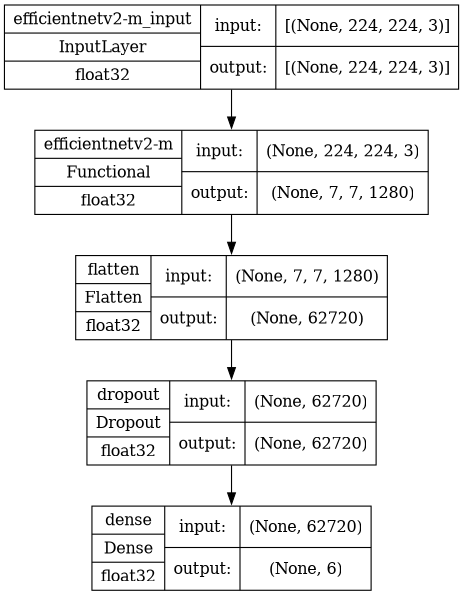

In [10]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visualization represents the model used.
</span></h5>

In [11]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

<h3 style="font-weight:700">ModelCheckpoint</h3>
Callback to save the Keras model or model weights at some frequency.

ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [12]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

<h3 style="font-weight:700">EarlyStopping</h3>
Stop training when a monitored metric has stopped improving..

In [13]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=40,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/40


2023-12-12 15:58:00.443886: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


194/194 [==============================] - 97s 351ms/step - loss: 2.1525 - accuracy: 0.5493 - val_loss: 1.2290 - val_accuracy: 0.7036
Epoch 2/40
194/194 [==============================] - 61s 308ms/step - loss: 1.7252 - accuracy: 0.6624 - val_loss: 1.1039 - val_accuracy: 0.7505
Epoch 3/40
194/194 [==============================] - 61s 306ms/step - loss: 1.5511 - accuracy: 0.7034 - val_loss: 1.0915 - val_accuracy: 0.7631
Epoch 4/40
194/194 [==============================] - 61s 308ms/step - loss: 1.4659 - accuracy: 0.7266 - val_loss: 0.9369 - val_accuracy: 0.8003
Epoch 5/40
194/194 [==============================] - 61s 306ms/step - loss: 1.4354 - accuracy: 0.7412 - val_loss: 0.8131 - val_accuracy: 0.8278
Epoch 6/40
194/194 [==============================] - 61s 307ms/step - loss: 1.3779 - accuracy: 0.7580 - val_loss: 0.7286 - val_accuracy: 0.8489
Epoch 7/40
194/194 [==============================] - 59s 297ms/step - loss: 1.3384 - accuracy: 0.7674 - val_loss: 0.9240 - val_accuracy: 0.8

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Training.
</span></h5>

<a name="6"></a>
# **<h1 id="6" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Model Performance</h1>**

In [14]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

49/49 [==============================] - 12s 216ms/step - loss: 0.7286 - accuracy: 0.8489
Test Loss = 0.7285832762718201
Test Accuracy = 0.8488672971725464


In [15]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.152515,0.549300,1.229049,0.703560
1,1.725151,0.662380,1.103948,0.750485
2,1.551081,0.703389,1.091488,0.763107
3,1.465938,0.726604,0.936922,0.800324
4,1.435354,0.741163,0.813069,0.827832
5,1.377895,0.757988,0.728583,0.848867
6,1.338357,0.767370,0.924036,0.823301
7,1.390828,0.773437,0.902912,0.839806
8,1.348678,0.783467,0.817224,0.860841
9,1.367661,0.786945,0.858021,0.855987


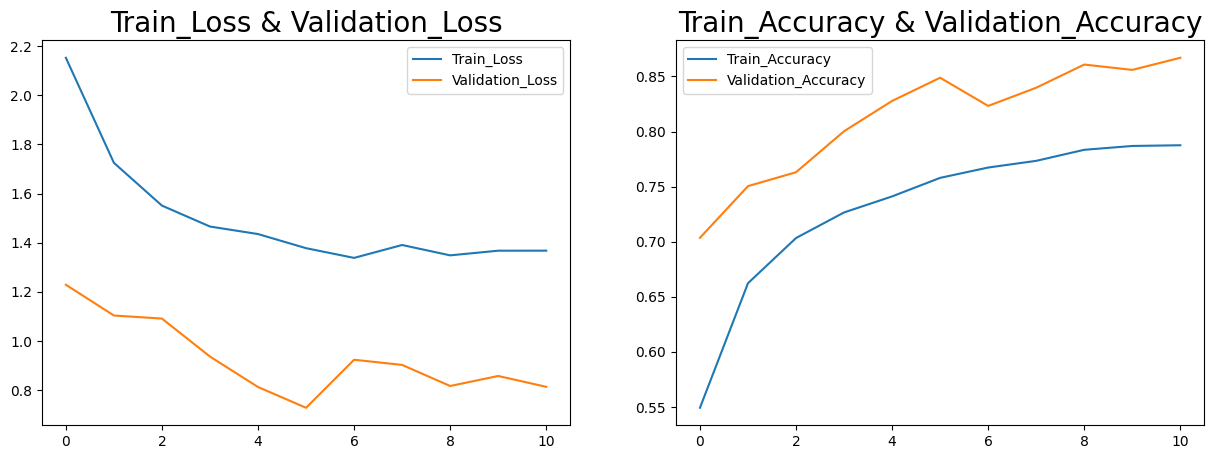

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  plot the training curve of the training set and the validation set.
</span></h5>

<div style="border-radius:10px; padding: 15px; background-color: #F0EFEB; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:900; font-size:200%"><font color=#d10202>📁 Conclusion</font></span></h4>    
    
You can try to use Module: tf.keras.applications to reference the module.(https://www.tensorflow.org/api_docs/python/tf/keras/applications),You can try MobileNet, ResNet and VGG..., all of them will have good accuracy. thank you!

<div style="border-radius:10px; padding: 15px; background-color:navy">
<h4 align="center"><span style="font-weight:1000; font-size:500%; text-shadow:3px 3px 20px #add8e6"><font color=#ffffff>Upvote and Comment</font></span></h4>